**Tutorial 7 - Monte Carlo Calculation $\pi$**

Here we will do a little warm up exercise in Monte Carlo calculations.


1) Imagine a circle circumscribed by a square.  The probability of a random point within the square being inside the circle is equal to the ratio of the area of the circle to the area of the square.  Use a uniform random number generator to calculate the value of $\pi$.  Use 1,000 and 10,000 points.

In [1]:
import numpy as np

np.random.seed(42)
N1 = 1000
N2 = 10000

points = -1. + np.random.rand(N1, 2)*2
score = 0
for i,j in points:
    if np.sqrt(i**2 + j**2) < 1:
        score += 1
PI = float(4*score/N1)
print('The value computed with %.i points is PI = %.4f' % (N1,PI))

points = -1. + np.random.rand(N2, 2)*2
score = 0
for i,j in points:
    if np.sqrt(i**2 + j**2) < 1:
        score += 1
PI = float(4*score/N2)
print('The value computed with %.i points is PI = %.4f' % (N2,PI))

The value computed with 1000 points is PI = 3.1040
The value computed with 10000 points is PI = 3.1512


2) Repeat the calculations above in a loop and record the values of $\pi$.  Make a histogram of your calculated $\pi$ values.  What is the variance of your estimate of $\pi$ using 1,000 and 10,000?  How does it scale with the number of points?

In [2]:
loop_size = 1000
N = [100, 500, 1000, 3000, 5000, 8000, 10000]

PI = np.empty((len(N), loop_size))

for F in range(len(N)):
    
    for k in range(loop_size):
        points = -1. + np.random.rand(N[F], 2)*2
        score = 0
        for i,j in points:
            if np.sqrt(i**2 + j**2) < 1:
                score += 1
        PI[F][k] = float(4*score/N[F])

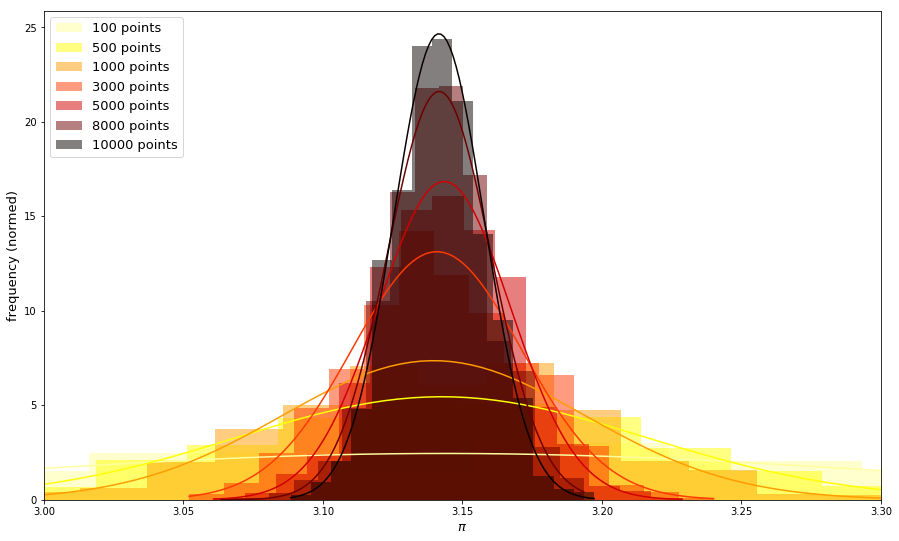

In [3]:
import scipy.stats as ss
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(15,9))
colors = np.linspace(0.9, 0, len(N))

for F in range(len(N)):
    x = np.linspace(np.min(PI[F][:]), np.max(PI[F][:]), 100)
    mean = np.mean(PI[F][:])
    std = np.std(PI[F][:])
    y = ss.norm.pdf(x, mean, std)
    
    plt.hist(PI[F][:], normed=True, bins=15, alpha=0.5, color=plt.cm.hot(colors[F]), label='%.i points' % N[F])
    plt.plot(x, y, color=plt.cm.hot(colors[F]))

plt.xlim(3., 3.3)
plt.xlabel('$\pi$', fontsize=13)
plt.ylabel('frequency (normed)', fontsize=13)
plt.legend(loc='upper left', fontsize=13)
plt.show()

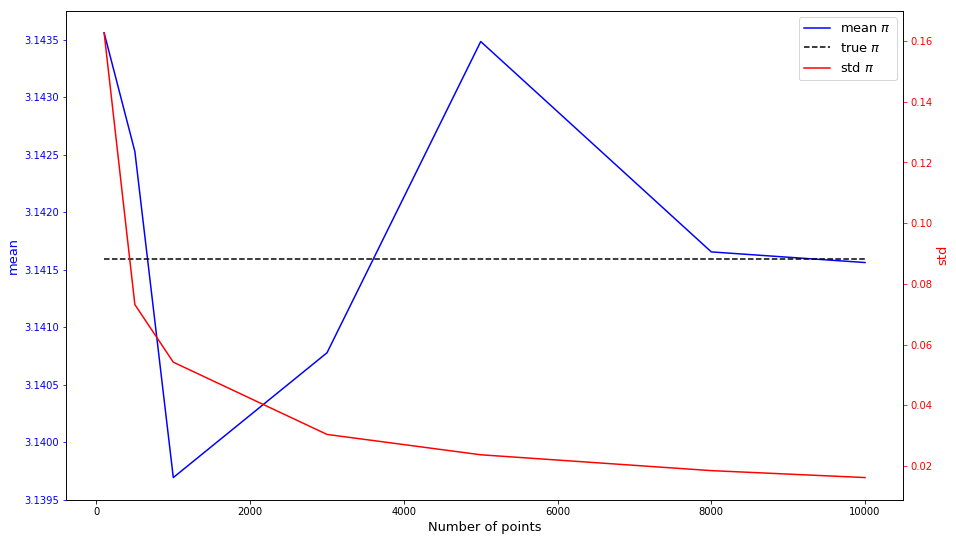

In [4]:
PI_mean = np.empty(len(N))
PI_std = np.empty(len(N))
real_PI = np.empty(len(N))
for F in range(len(N)):
    PI_mean[F] = np.mean(PI[F][:])
    PI_std[F] = np.std(PI[F][:])
    real_PI[F] = np.pi

fig, ax1 = plt.subplots(figsize=(15,9))
l1, = ax1.plot(N, PI_mean, color='blue', label='mean $\pi$')
l2, = ax1.plot(N, real_PI, color='black', linestyle='--', label='true $\pi$')
ax1.set_xlabel('Number of points', fontsize=13)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('mean', color='blue', fontsize=13)
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
l3, = ax2.plot(N, PI_std, color='red', label='std $\pi$')
ax2.set_ylabel('std', color='red', fontsize=13)
ax2.tick_params('y', colors='red')

plt.legend([l1, l2, l3], ['mean $\pi$', 'true $\pi$', 'std $\pi$'], loc='upper right', fontsize=13)
plt.show()

3) What was done above in two dimensions can be done in more dimensions.  Calculate the volume of a 5 dimensional ball of unit radius in the same way.  Calculate its variance of your estimate in the same way.  Use enough points to get three significant figures.

In [26]:
N = 10000
loop_size = 300

vol_vect = np.empty(loop_size)
ratio = 1.
index = 1

while (ratio>0.01):
    for A in range(loop_size):
        points = -1. + np.random.rand(N, 5)*2
        score = 0
        for i,j,k,l,m in points:
            if np.sqrt(i**2  + j**2 + k**2 + l**2 + m**2) < 1:
                score += 1
        vol_vect[A] = float(2.**5 * score / N)

    mean_vol = np.mean(vol_vect)
    std_vol = np.std(vol_vect)
    ratio = std_vol/mean_vol
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('Try #%.i' % index)
    print('N points = %.i' % N)
    print('computed volume = %.3f +/- %.3f' % (mean_vol,std_vol))
    N += 2000
    index += 1
    if index>10:
        print('###  Computing time too long  ###')
        break
    
real_volume = 2.*np.pi**2/5.*4./3.

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('The volume computed with %.i points is V = %.3f +/- %.3f' % (N-2000,mean_vol,std_vol))
print('The real volume of the 5D shpere is V = %.3f' % real_volume)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Try #1
N points = 10000
computed volume = 5.270 +/- 0.118
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Try #2
N points = 12000
computed volume = 5.257 +/- 0.115
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Try #3
N points = 14000
computed volume = 5.260 +/- 0.091
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Try #4
N points = 16000
computed volume = 5.264 +/- 0.090
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Try #5
N points = 18000
computed volume = 5.262 +/- 0.088
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Try #6
N points = 20000
computed volume = 5.266 +/- 0.087
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Try #7
N points = 22000
computed volume = 5.260 +/- 0.082
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Try #8
N points = 24000
computed volume = 5.261 +/- 0.073
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Try #9
N points = 26000
computed volume = 5.266 +/- 0.071
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Try #10
N points = 28000
computed volume = 5.265 +/- 0.071
###  Computing time too long  ###
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~